# Prediksi Churn Nasabah di Bank Menggunakan Model Machine Learning: Artificial Neural Network

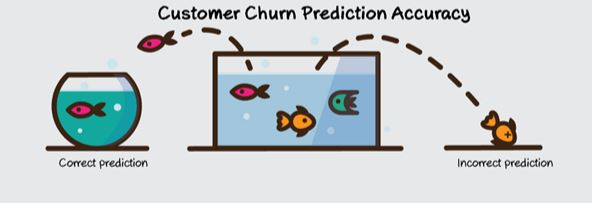

### Mengimport modul python yang diperlukan

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [11]:
tf.__version__

'2.9.1'

## Bagian 1 - Data Preprocessing

### Mengimpor dataset

In [13]:
dataset = pd.read_csv('Dataset_9_-_Banking.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [16]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
print(y)

[1 0 1 ... 1 1 0]


### Pengkodean data secara kategorikal

Label Encoding kolom "Gender"

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [22]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding kolom "Geografi"

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Memisahkan dataset menjadi Training set dan Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
y_train = pd.DataFrame(y_train)
y_train.value_counts()

0    6368
1    1632
dtype: int64

### Penskalaan fitur

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Bagian 2 - Membuat ANN (Artificial Neural Network)

### Inisialisasi ANN

In [28]:
ann = tf.keras.models.Sequential()

### Menambahkan input layer pertama dan hidden layer pertama

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Menambahkan hidden layer kedua

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Menambahkan output layer

In [31]:
ann.add(tf.keras.layers.Dense(units5=1, activation='sigmoid'))

## Bagian 3 - Training ANN

### Mengcompile ANN

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training ANN pada Training set yang sudah dipisahkan

In [33]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.7106
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4705 - accuracy: 0.8026
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.8051
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.8079
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8115
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8152
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.8184
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8230
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8253
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8289

## Bagian 4 - Membuat prediksi dan mengevaluasi model

### Memprediksi hasil dari satu pengamatan observasi

Gunakan model ANN tadi untuk memprediksi apakah pelanggan dengan informasi berikut akan meninggalkan bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

Jadi, haruskah kita mengucapkan selamat tinggal kepada pelanggan itu?

**SOLUSI**

In [34]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 225ms/step
[[False]]


Oleh karena itu, model ANN ini memprediksi bahwa pelanggan ini tetap berada di bank!

**Catatan penting 1:** Perhatikan semua nilai fitur yang dimasukkan ke dalam kurung siku. Hal itu dikarenakan metode "predict" selalu mengharapkan array 2D sebagai format inputnya. Dengan menempatkan nilai fitur yang kita miliki ke dalam kurung siku membuat input menjadi array 2D.

**Catatan penting 2:** Perhatikan juga bahwa negara "Prancis" tidak dimasukkan sebagai string di kolom terakhir tetapi sebagai "1, 0, 0" di tiga kolom pertama. Hal itu dikarenakan metode prediksi mengharapkan nilai fitur dalam nilai vektor, dan seperti yang kita lihat di baris pertama matriks fitur X, "Prancis" dikodekan sebagai "1, 0, 0". Dan berhati-hatilah untuk memasukkan nilai-nilai ini di tiga kolom pertama, karena variabel dummy selalu dibuat di kolom pertama.

### Memprediksi hasil Test Set

In [35]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [41]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [38]:
y_pred.size

2000

### Membuat Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1508   87]
 [ 196  209]]


0.8585

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## Kesimpulan (hasil akhir dan saran perbaikan)

Oleh karena itu, dengan akurasi keseluruhan 86%, dapat dikatakan bahwa model yang diperoleh dari metode Artificial Neural Network adalah yang terbaik untuk dipilih.

Saran perbaikan:
* Akan lebih bagus jika terdapat visualisasi data yang lebih baik seperti dengan menggunakan grafik. 
* Output selain hanya memberikan akurasi akan lebih baik jika menghasilkan sebuah output file (contoh: .csv) dengan rincian seluruh hasil prediksi.
* Akurasi dapat ditingkatkan lagi dengan mengatur layer pada neural network dan memperbaiki serta menambah data.


## Referensi Pengerjaan

https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6

https://www.analyticsvidhya.com/blog/2021/05/beginners-guide-to-artificial-neural-network/